In [1]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

## Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

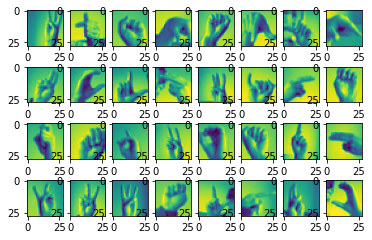

In [4]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [5]:
datagen.fit(x_train)

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

  ...
    to  
  ['...']
Train for 857.96875 steps, validate on 7172 samples
Epoch 1/20
858/857 [==============================] - 122s 143ms/step - loss: 1.0951 - accuracy: 0.6499 - val_loss: 0.3906 - val_accuracy: 0.8593
Epoch 2/20
858/857 [==============================] - 115s 134ms/step - loss: 0.3076 - accuracy: 0.8955 - val_loss: 0.1926 - val_accuracy: 0.9307
Epoch 3/20
858/857 [==============================] - 112s 131ms/step - loss: 0.1989 - accuracy: 0.9336 - val_loss: 0.2344 - val_accuracy: 0.9296
Epoch 4/20
858/857 [==============================] - 111s 130ms/step - loss: 0.1443 - accuracy: 0.9531 - val_loss: 0.0320 - val_accuracy: 0.9925
Epoch 5/20
858/857 [==============================] - 109s 127ms/step - loss: 0.1284 - accuracy: 0.9589 - val_loss: 0.1456 - val_accuracy: 0.9508
Epoch 6/20
858/857 [==============================] - 113s 131ms/step - loss: 0.1089 - accuracy: 0.9655 - val_loss: 0.6509 - val_accuracy: 0.8433
Epoch 7/20
858/857 [===========================

In [8]:
model.save('asl_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: asl_model\assets


In [9]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}